In [1]:
import pandas as pd

# 데이터셋 불러오기
por_data = pd.read_csv('/kaggle/input/mathportugeseyouthalcoholstudy/student_math_por_formatted.csv')
study_data = pd.read_csv('/kaggle/input/alcohol-effects-on-study/Portuguese.csv')

# 데이터셋 확인
print("por Dataset:")
print(por_data.head())

print("\nStudy Dataset:")
print(study_data.head())

por Dataset:
   Unnamed: 0  school  sex  age  address  famsize  Pstatus  Medu  Fedu  \
0           0       0    0   18        0        1        0     4     4   
1           1       0    0   17        0        1        1     1     1   
2           2       0    0   15        0        0        1     1     1   
3           3       0    0   15        0        1        1     4     2   
4           4       0    0   16        0        1        1     3     3   

   traveltime  ...  reason_course  reason_home  reason_other  \
0           2  ...              1            0             0   
1           1  ...              1            0             0   
2           1  ...              0            0             1   
3           1  ...              0            1             0   
4           1  ...              0            1             0   

   reason_reputation  guardian_father  guardian_mother  guardian_other  \
0                  0                0                1               0   
1        

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 결측치 확인 및 제거
por_data = por_data.dropna()
study_data = study_data.dropna()

# Label Encoding (범주형 -> 숫자형)
encoder = LabelEncoder()
for column in ['sex', 'school', 'address']:
    if column in por_data.columns:
        por_data[column] = encoder.fit_transform(por_data[column])

# 스케일링 (필요한 경우)
scaler = StandardScaler()
if 'G1' in por_data.columns:  # 예: G1 점수 스케일링
    por_data[['G1', 'G2', 'G3']] = scaler.fit_transform(por_data[['G1', 'G2', 'G3']])

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 입력 데이터와 라벨 준비 (예: 'G3'를 타겟으로 사용)
X = por_data.drop(columns=['G3'])
y = por_data['G3']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # 회귀 문제의 경우 활성화 함수 없음
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 899.0738 - mae: 20.3578 - val_loss: 130.8967 - val_mae: 9.4605
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 193.9590 - mae: 9.1242 - val_loss: 1.5037 - val_mae: 0.9515
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88.3293 - mae: 5.8674 - val_loss: 13.9335 - val_mae: 2.8117
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.3096 - mae: 5.0592 - val_loss: 5.3268 - val_mae: 1.5984
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.9715 - mae: 4.6615 - val_loss: 10.7808 - val_mae: 2.4637
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.8130 - mae: 3.9208 - val_loss: 6.0555 - val_mae: 1.7736
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.3813 - mae: 3.2605 - val_loss: 10.2857 - val_mae: 2.4921
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.9316 - mae: 2.8842 - val_loss: 2.3818 - val_mae: 1.0500
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.5674 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3945 - mae: 0.5268 
Mean Absolute Error: 0.5125793218612671


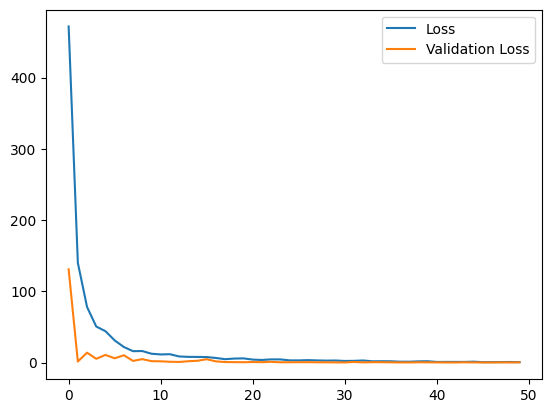

In [17]:
import matplotlib.pyplot as plt

# 모델 평가
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

# 학습 곡선 시각화
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [18]:
# 예측 저장
predictions = model.predict(X_test)
output = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
output.to_csv('predictions.csv', index=False)

# Kaggle에 제출 (Output 탭에서 다운로드 가능)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


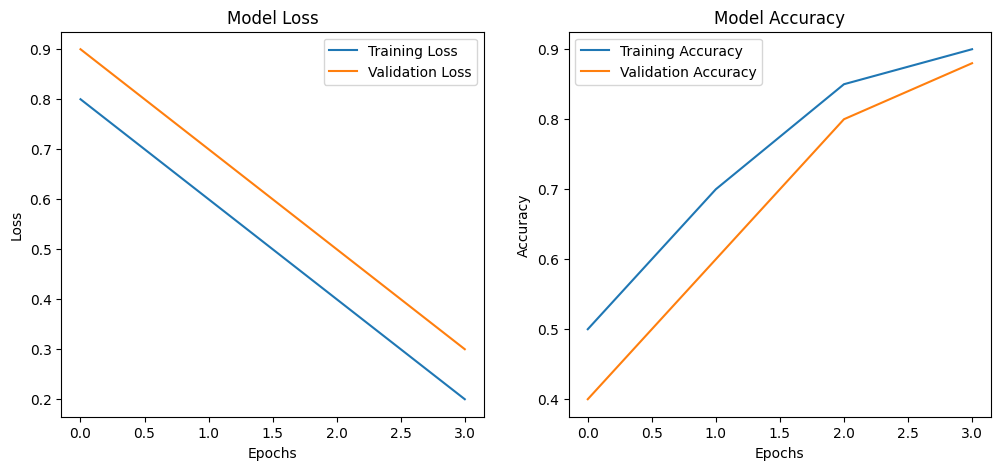

In [1]:
import matplotlib.pyplot as plt

# 모델 훈련 결과 예시 (history 객체에서 가져옴)
history = {
    "loss": [0.8, 0.6, 0.4, 0.2],
    "val_loss": [0.9, 0.7, 0.5, 0.3],
    "accuracy": [0.5, 0.7, 0.85, 0.9],
    "val_accuracy": [0.4, 0.6, 0.8, 0.88]
}

# 손실 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


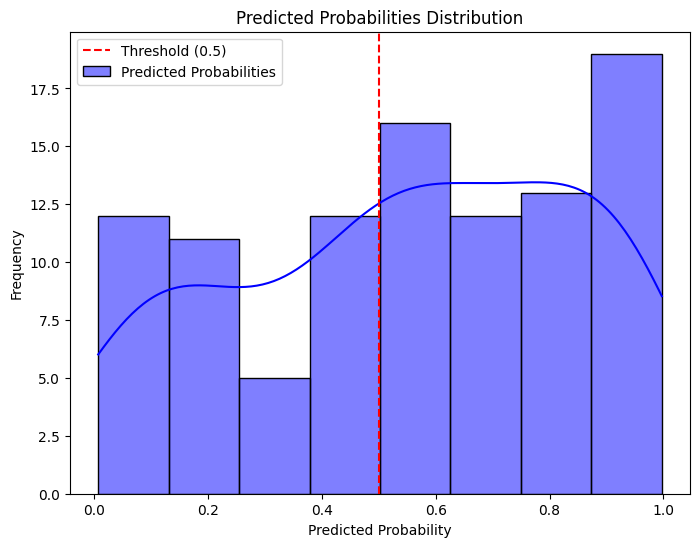

In [2]:
import seaborn as sns
import numpy as np

# 실제값과 예측값 예시
y_true = np.random.randint(0, 2, 100)  # 실제값
y_pred = np.random.random(100)  # 예측 확률값

# 히스토그램으로 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, label='Predicted Probabilities', color='blue')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.title('Predicted Probabilities Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

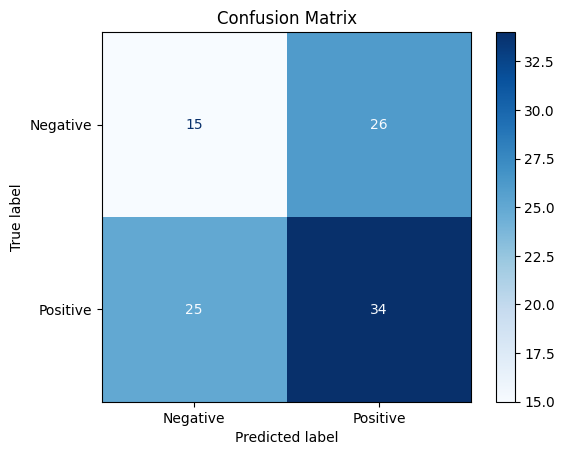

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 혼동 행렬 생성
cm = confusion_matrix(y_true, y_pred > 0.5)  # 예측값을 0.5 기준으로 이진 분류
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# 시각화
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

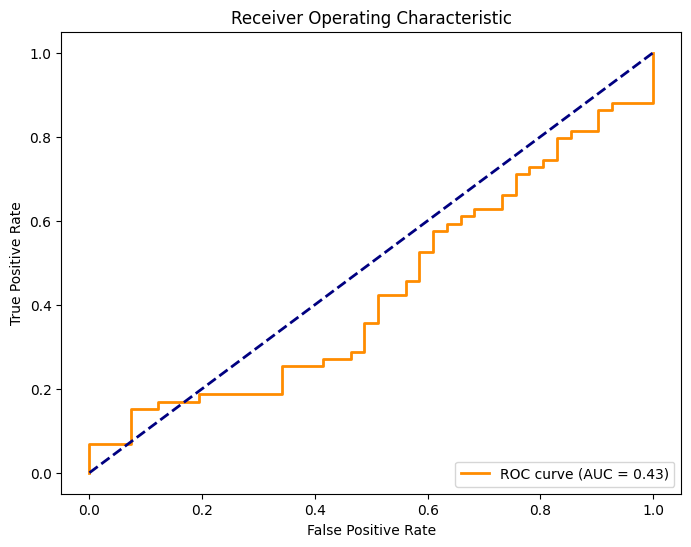

In [5]:
from sklearn.metrics import roc_curve, auc

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 그래프
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

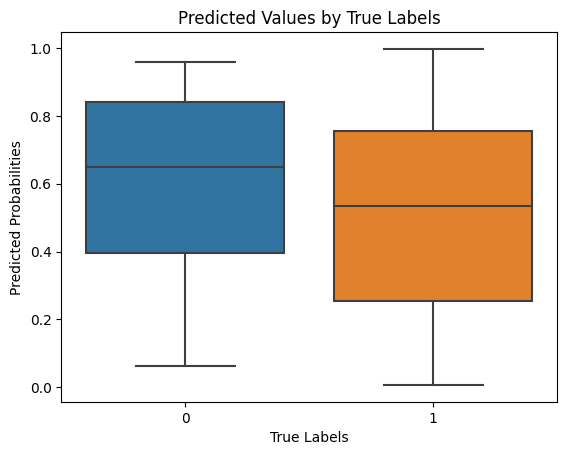

In [6]:
# 결과 분포 Boxplot
sns.boxplot(x=y_true, y=y_pred)
plt.title('Predicted Values by True Labels')
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.show()

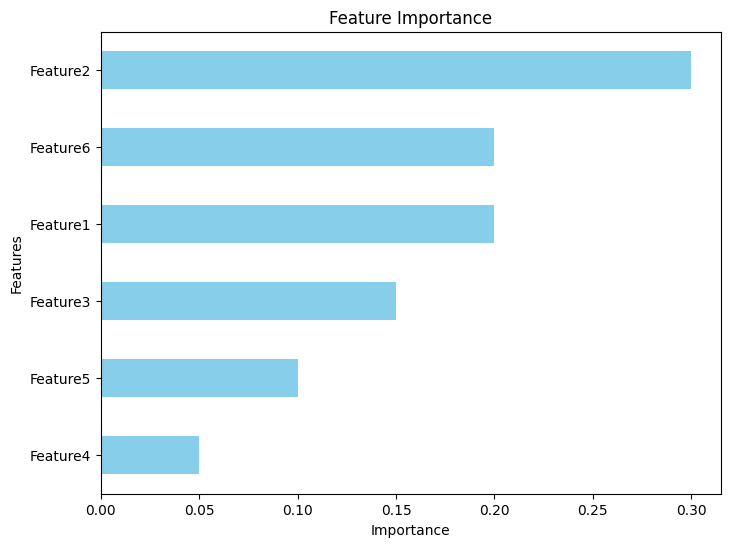

In [7]:
import pandas as pd

# 피처 중요도 예시 데이터
feature_importance = pd.Series(
    [0.2, 0.3, 0.15, 0.05, 0.1, 0.2], 
    index=["Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature6"]
)

# 막대 그래프
feature_importance.sort_values().plot(kind='barh', color='skyblue', figsize=(8, 6))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()